#**CUSTOMER-MARKET-SEGMENTATION**
This project assists you in determining which customers belong to which categories.

In [27]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from tqdm import tqdm
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the Dataset
data = pd.read_csv("/content/Customer Data.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.shape # Checking shape of the dataset

(8950, 18)

In [6]:
data.info() # Getting information from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe() # Describing the data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
data.isnull().sum() # Checking for null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Removing null values
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [10]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
data.duplicated().sum() # Checking for duplicates

0

In [12]:
data.drop('CUST_ID', axis=1, inplace=True) # Dropping unwanted columns

In [13]:
data.columns # Checking columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

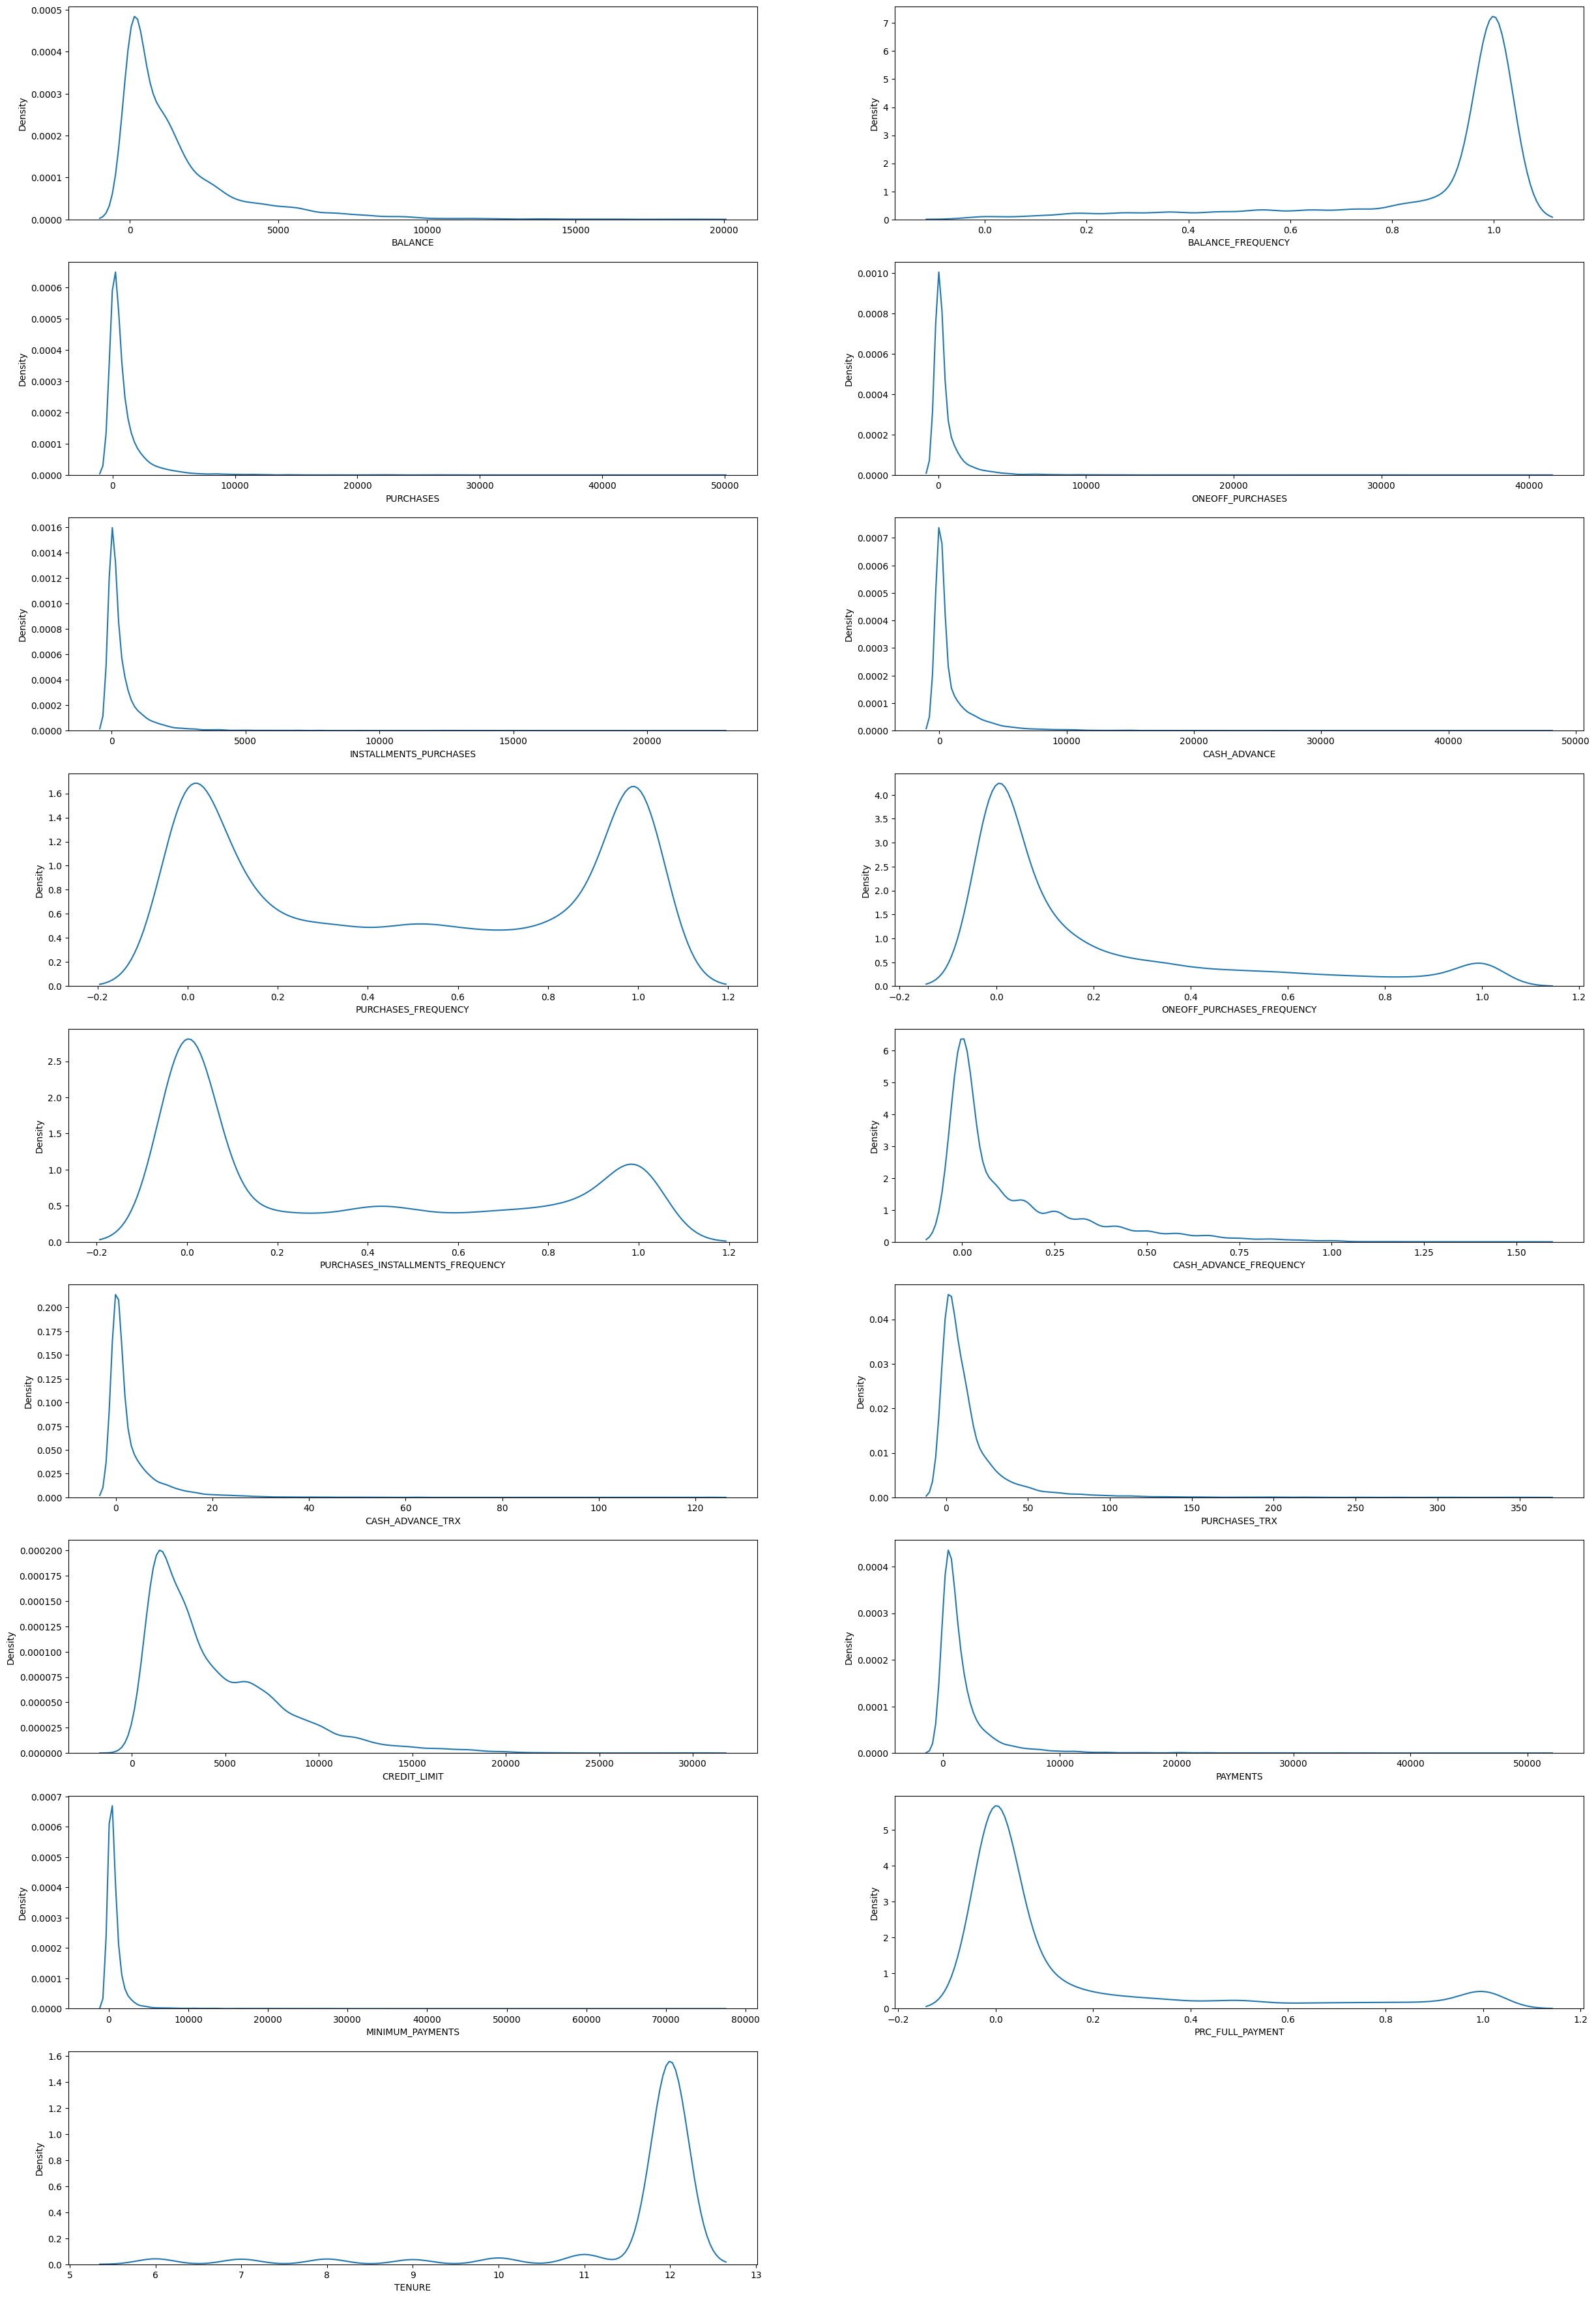

In [14]:
# Vishvalizing the distribution of the data using KDE plot
plt.figure(figsize=(30,45))
for i, col in enumerate(data.columns):
  if data[col].dtype != 'object':
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
    plt.xlabel(col)
plt.show()

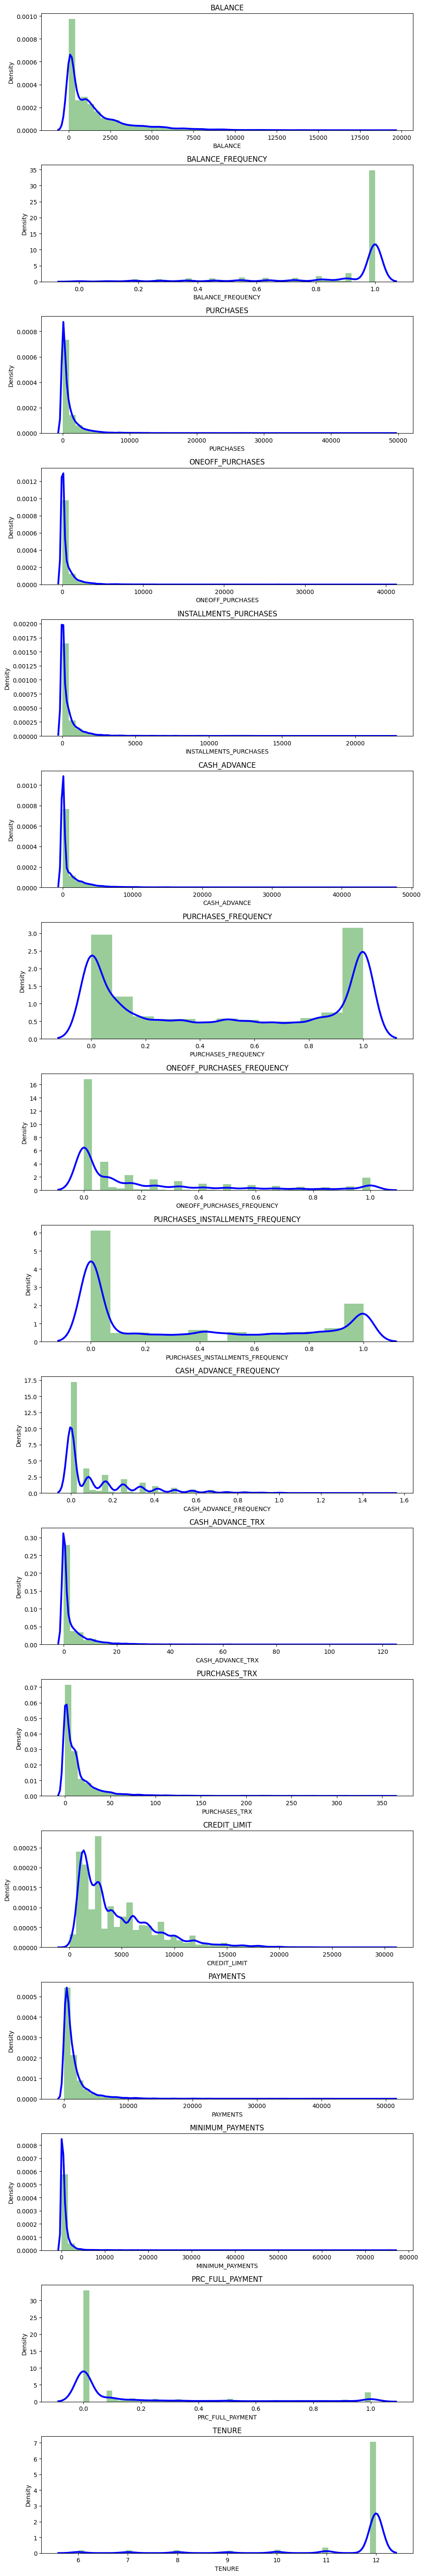

In [15]:
# Vishvalizing the distribution of the data using Distplot
plt.figure(figsize=(10,60))
for i in range(0,17):
  plt.subplot(17, 1, i+1)
  sns.distplot(data[data.columns[i]], kde_kws={'color':'b', 'bw':0.1, 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(data.columns[i])
plt.tight_layout()

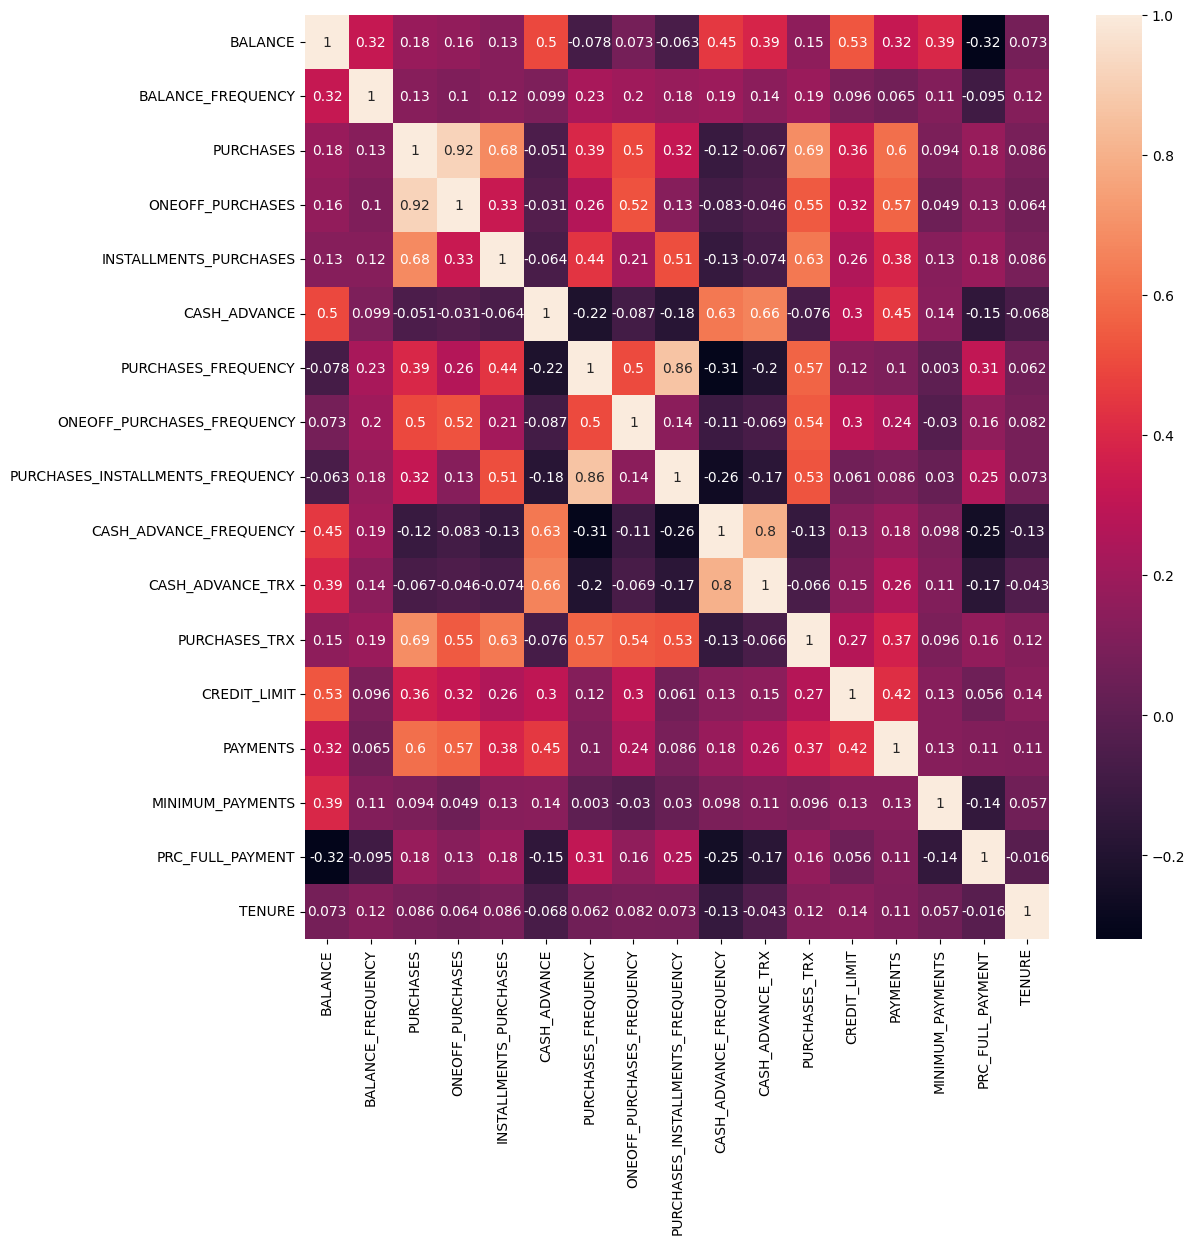

In [16]:
# Checking the correlation of the data
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
# Normalizing the data
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [18]:
# Creating new data frame using the scaled data
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [19]:
# Performing dimensionality reduction on the data
pca = PCA(n_components=2)
pca_model = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_model, columns=['PCA1', 'PCA2'])
pca_data

,PCA1,PCA2
0,-1.682220,-1.076456
1,-1.138292,2.506461
2,0.969677,-0.383457
3,-0.873626,0.043152
4,-1.599434,-0.688582
...,...,...
8945,-0.359629,-2.016150
8946,-0.564369,-1.639124
8947,-0.926203,-1.810791
8948,-2.336550,-0.657984


In [29]:
# Creating a list and dictionaries of models and their parameters and evaluation metrics for validating cluster models and for hyperparameter tuning
algorithms = [KMeans, AgglomerativeClustering, DBSCAN, GaussianMixture]

hyperparameters = {
    KMeans:range(2,11),
    AgglomerativeClustering:['ward', 'complete', 'average', 'single'],
    DBSCAN:[0.1, 0.25, 0.3],
    GaussianMixture:range(2,6)
}

evaluation_metrics = {
    'Scilhouette Score':silhouette_score,
    'Davise-Bouldin Index':davies_bouldin_score,
    'Calinski-Harabasz Index':calinski_harabasz_score
}

In [32]:
# Validating cluster models and performing hyperparameters tuning
results = {}

for algorithm in tqdm(algorithms, desc='Algorithms'):
  for param in tqdm(hyperparameters[algorithm], desc='Hyperparameters'):
    if algorithm == AgglomerativeClustering:
      model = AgglomerativeClustering(n_clusters=3, linkage=param)
    else:
      model = algorithm(param)
    labels = model.fit_predict(scaled_data)

    for metric_name, metric_func in evaluation_metrics.items():
      score = metric_func(scaled_data, labels)
      results[f'{algorithm.__name__}_{param}_{metric_name}'] = score

Algorithms: 100%|██████████| 4/4 [01:12<00:00, 18.21s/it]


In [33]:
# Creating data frame for viewing results from Validating cluster models and hyperparameters tuning to find the best model
df1 = pd.DataFrame(results.keys(), columns=['Algorithms Details'])
df1['Score'] = results.values()
df1

,Algorithms Details,Score
0,KMeans_2_Scilhouette Score,0.209504
1,KMeans_2_Davise-Bouldin Index,1.912244
2,KMeans_2_Calinski-Harabasz Index,1706.141774
3,KMeans_3_Scilhouette Score,0.206843
4,KMeans_3_Davise-Bouldin Index,1.659626
5,KMeans_3_Calinski-Harabasz Index,1570.803458
6,KMeans_4_Scilhouette Score,0.197619
7,KMeans_4_Davise-Bouldin Index,1.575197
8,KMeans_4_Calinski-Harabasz Index,1597.522232
9,KMeans_5_Scilhouette Score,0.193300


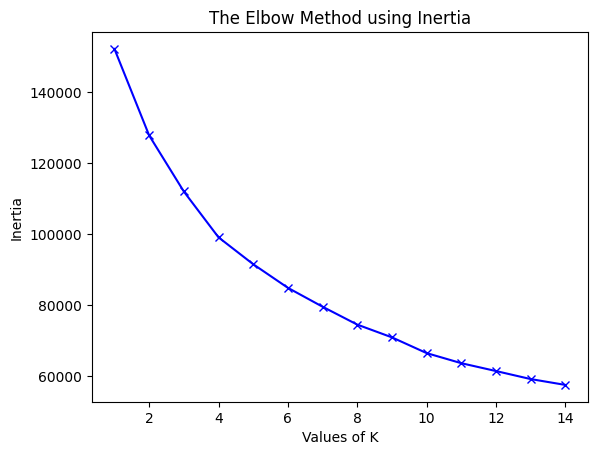

In [34]:
# Cross checking the value of k using the elbow method to find the best value of k
inertia = []
range_val = range(1, 15)
for i in range_val:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(scaled_data)
  inertia.append(kmeans.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

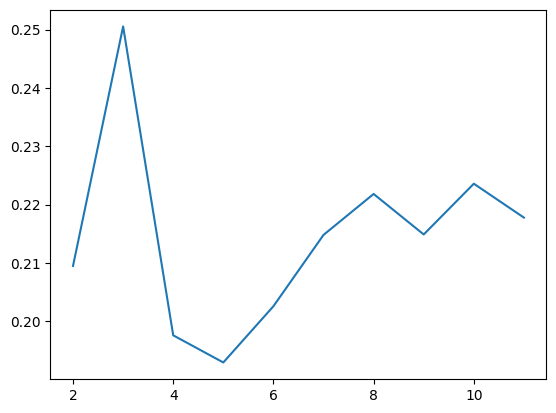

In [36]:
# Vishvalizing and checking silhouette score for better understanding to find the best value of k
score = []
k_num = list(range(2, 12))
for i in k_num:
  model = KMeans(n_clusters=i)
  preds = model.fit_predict(scaled_data)
  sil = silhouette_score(scaled_data, preds)
  score.append(sil)

plt.plot(k_num, score)
plt.show()

In [37]:
# Selecting the best model and fitting the data
model = KMeans(3)
model.fit(scaled_data)
pca_data_model = pd.concat([pca_data, pd.DataFrame({'cluster':model.labels_})], axis=1)

In [38]:
pca_data_model # Viewing the clusters

,PCA1,PCA2,cluster
0,-1.682220,-1.076456,2
1,-1.138292,2.506461,1
2,0.969677,-0.383457,2
3,-0.873626,0.043152,2
4,-1.599434,-0.688582,2
...,...,...,...
8945,-0.359629,-2.016150,2
8946,-0.564369,-1.639124,2
8947,-0.926203,-1.810791,2
8948,-2.336550,-0.657984,2


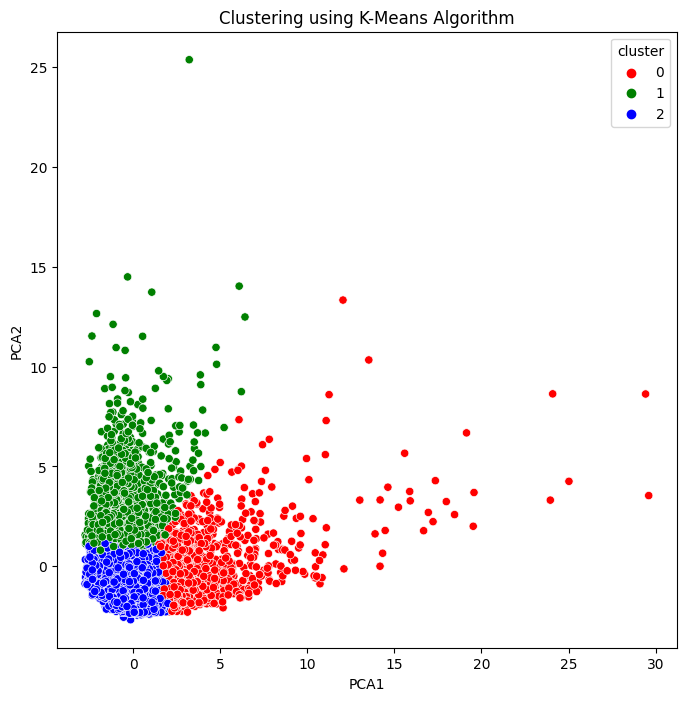

In [39]:
# Vishvalizing the clustered data
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_data_model, palette=['red', 'green', 'blue', 'black'])
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [40]:
# Checking cluster centers
cluster_centers = pd.DataFrame(model.cluster_centers_, columns=[data.columns])
cluster_centers = ss.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2228.026120,0.981492,4267.525421,2716.449393,1551.561464,460.625971,0.949134,0.667760,0.744791,0.063367,1.535599,56.478155,7738.228155,4151.340126,1226.211303,0.298390,11.923139
1,3981.961277,0.957891,382.624762,248.083296,134.618954,3868.303195,0.231664,0.110838,0.143616,0.447132,12.392231,5.572055,6675.128161,3016.457991,1793.702161,0.033774,11.347744
2,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568


In [41]:
# Adding the clustered data column to the existing data
clusterd_data = pd.concat([data, pd.DataFrame({'Cluster':model.labels_})], axis=1)
clusterd_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Axes: xlabel='Cluster', ylabel='count'>

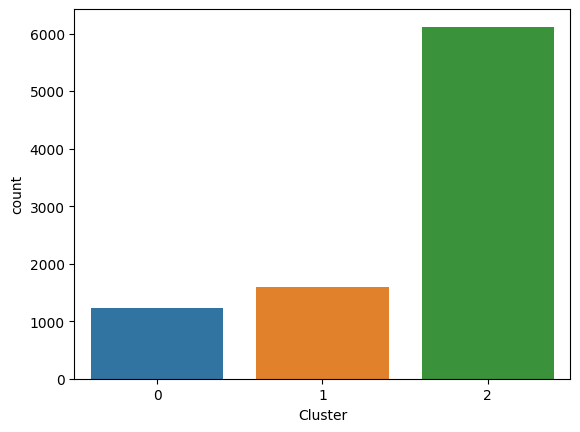

In [42]:
# Vishvalizing the clusters and their count
sns.countplot(x='Cluster', data=clusterd_data)
plt.show()

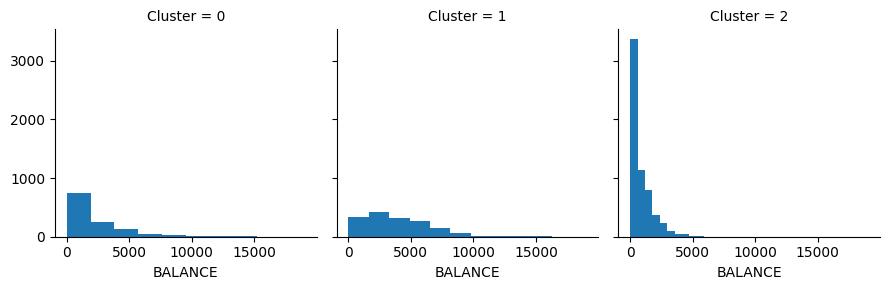

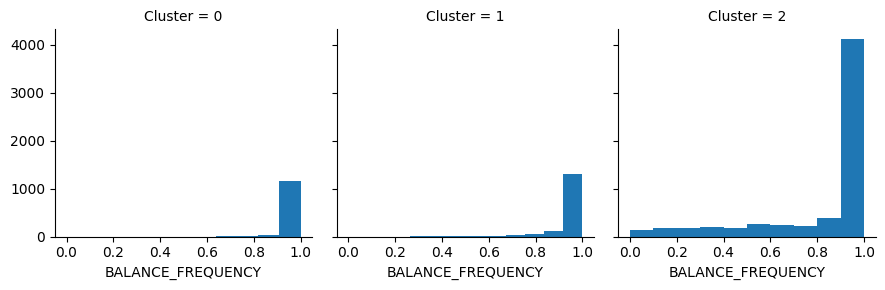

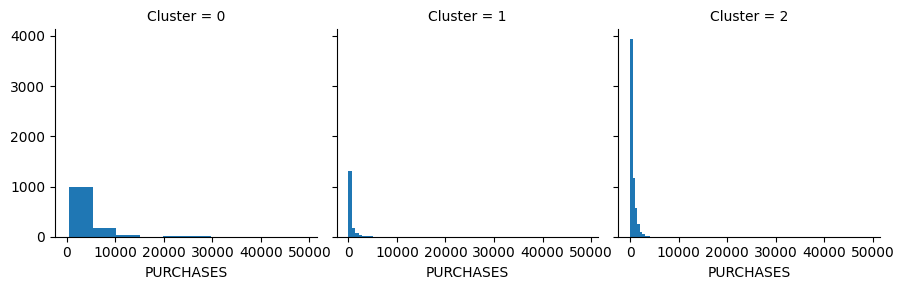

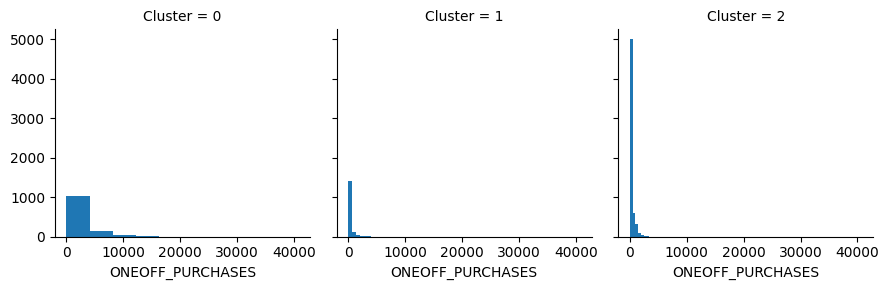

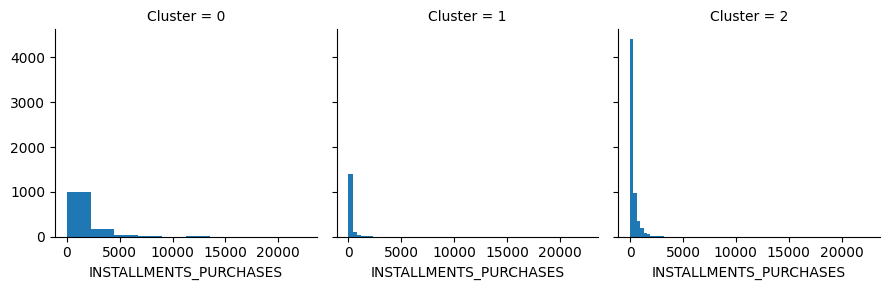

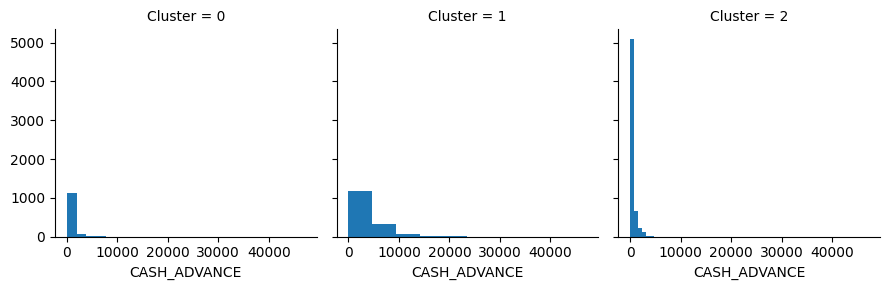

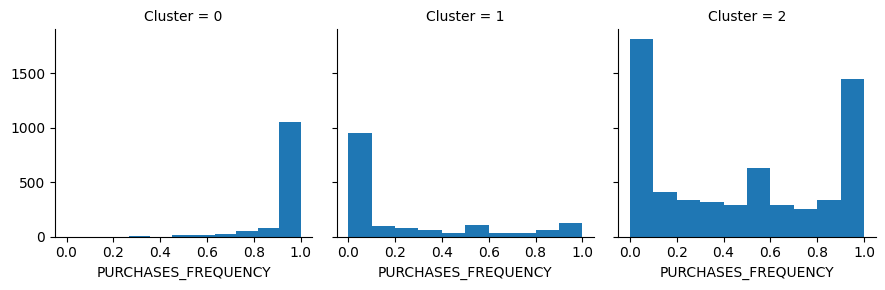

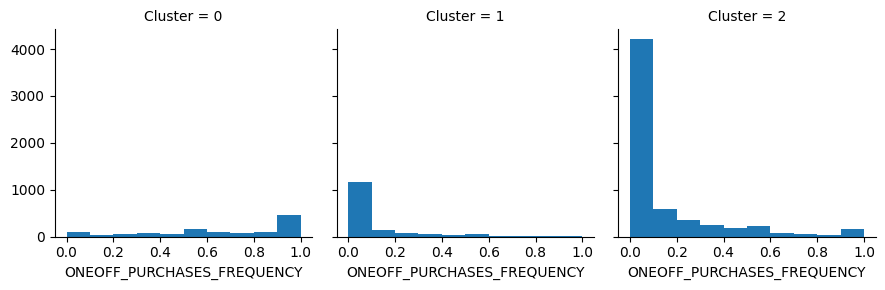

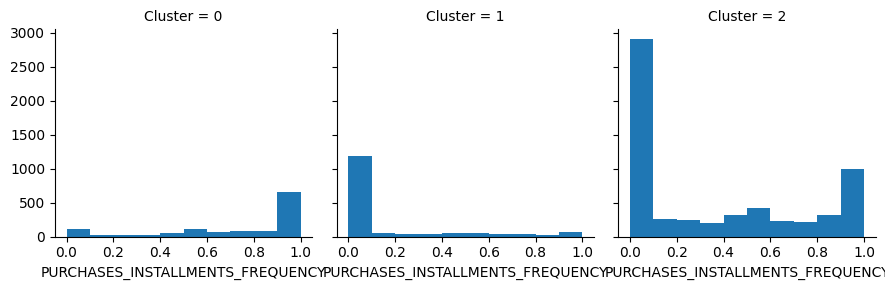

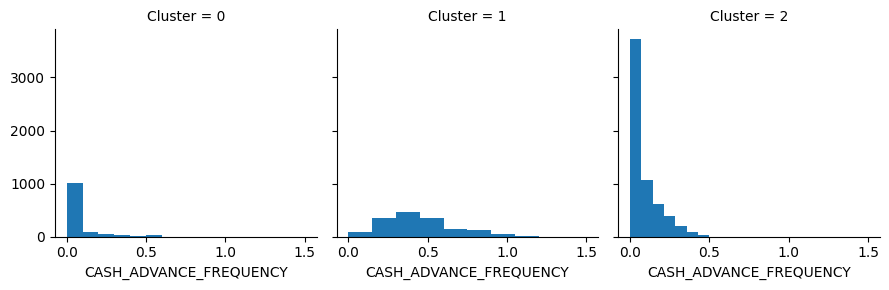

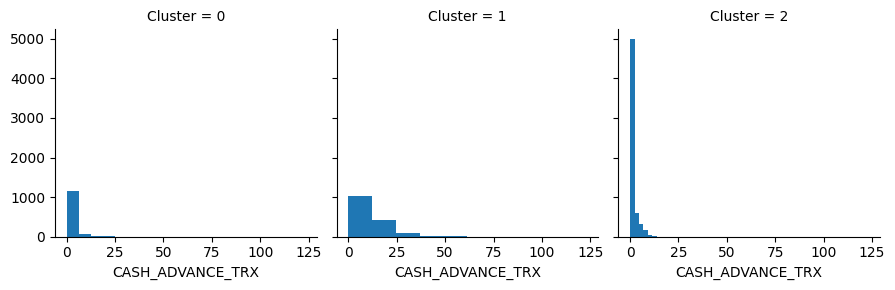

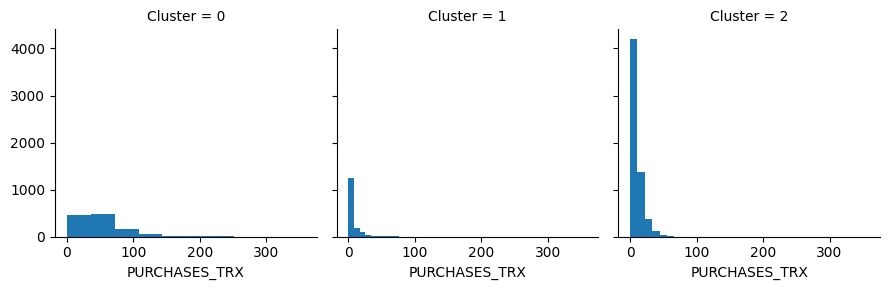

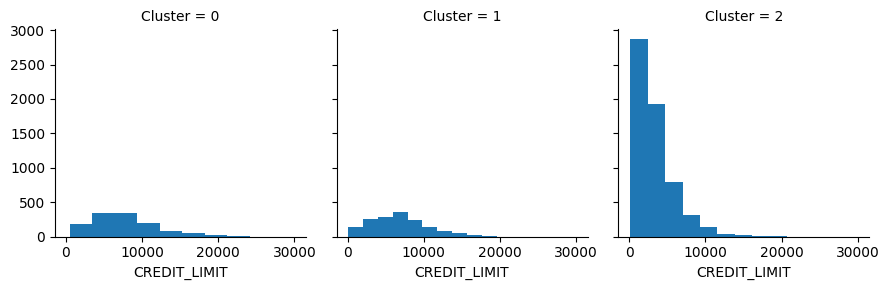

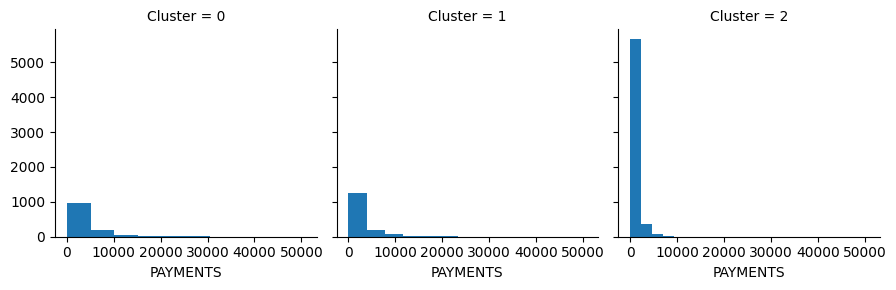

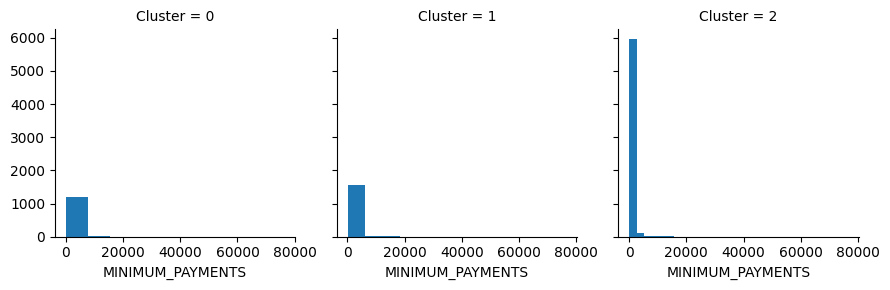

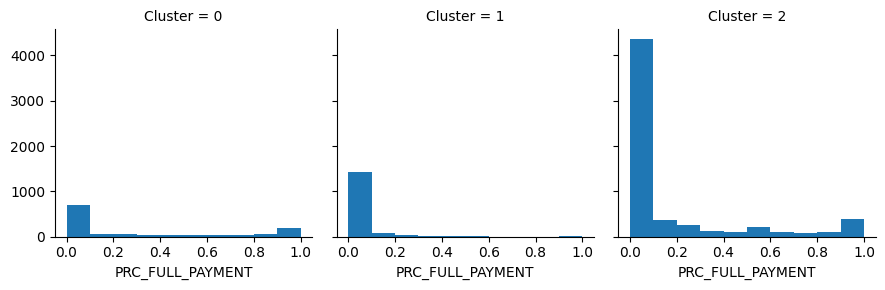

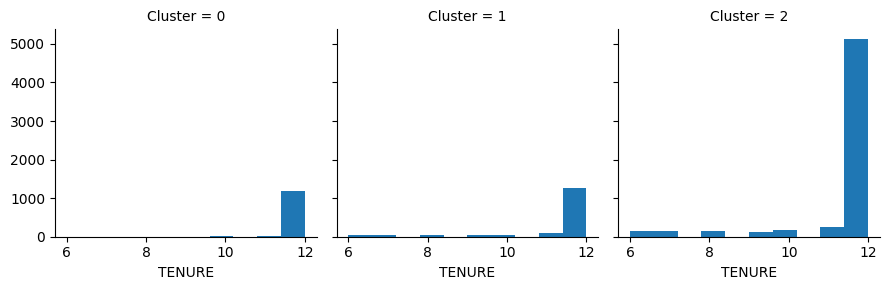

In [43]:
# Vishvalizing the clusters and distribution of the corresponding columns
for i in clusterd_data.drop(['Cluster'], axis=1):
  grid = sns.FacetGrid(clusterd_data, col='Cluster')
  grid = grid.map(plt.hist, i)
plt.show()

In [44]:
joblib.dump(model, 'customer_segment.pkl') # Saving the model

['customer_segment.pkl']

In [45]:
clusterd_data.to_csv('Clusterd_Customer_Data.csv') # Saving the newly created dataset

In [46]:
# Spliting the data from the newly created dataset
X = clusterd_data.drop('Cluster', axis=1)
y = clusterd_data['Cluster']

In [47]:
# Creating training and testing data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [48]:
# Checking shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7160, 17), (1790, 17), (7160,), (1790,))

In [49]:
# Creating a dictionary of models and their parameters for  Cross Validation and  Hyperparameter Tuning

params = {'DecisionTreeClassifier':{'model':DecisionTreeClassifier(),'param':{'max_features':['int', 'float', 'auto', 'sqrt', 'log2', 'None'],
                                                                              'max_leaf_nodes':[50, 60, 70]}
                                    },
          'SVC':{'model':SVC(kernel='rbf'), 'param':{'C':[5, 10, 20]}
                 },
          'RandomForestClassifier':{'model':RandomForestClassifier(), 'param':{'n_estimators':[1, 5, 10]}
                                    },
          'MultinomialNB':{'model':MultinomialNB(force_alpha=False), 'param':{'alpha':[0,1.0,1.5,2.0,2.5,3.0]}
                           },
          'LogisticRegression':{'model':LogisticRegression(), 'param':{'C':[1, 5, 10],
                                                                       'solver':['lbfgs', 'newton-cg', 'sag', 'saga', 'Liblinear'],
                                                                       'multi_class':['auto', 'ovr']}
                                },
          'KNeighborClassifier':{'model':KNeighborsClassifier(n_neighbors=4), 'param':{'weights':['uniform', 'distance'],
                                                                                      'leaf_size':[30,35,40],
                                                                                      'p':[1,2],
                                                                                      'n_jobs':[1,-1]}}}

In [50]:
# Performing Cross Validation and  Hyperparameter Tuning to find the best model

score = []

for mod_name, mod_param in params.items():
  clf = GridSearchCV(mod_param['model'], mod_param['param'], cv=5, scoring='accuracy', verbose=10, return_train_score=False)
  clf.fit(X, y)
  score.append({
      'Model Name':mod_name,
      'Best Score':clf.best_score_,
      'Best Param':clf.best_params_
  })

df = pd.DataFrame(score, columns=['Model Name', 'Best Score', 'Best Param'])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START max_features=int, max_leaf_nodes=50........................
[CV 1/5; 1/18] END max_features=int, max_leaf_nodes=50;, score=nan total time=   0.0s
[CV 2/5; 1/18] START max_features=int, max_leaf_nodes=50........................
[CV 2/5; 1/18] END max_features=int, max_leaf_nodes=50;, score=nan total time=   0.0s
[CV 3/5; 1/18] START max_features=int, max_leaf_nodes=50........................
[CV 3/5; 1/18] END max_features=int, max_leaf_nodes=50;, score=nan total time=   0.0s
[CV 4/5; 1/18] START max_features=int, max_leaf_nodes=50........................
[CV 4/5; 1/18] END max_features=int, max_leaf_nodes=50;, score=nan total time=   0.0s
[CV 5/5; 1/18] START max_features=int, max_leaf_nodes=50........................
[CV 5/5; 1/18] END max_features=int, max_leaf_nodes=50;, score=nan total time=   0.0s
[CV 1/5; 2/18] START max_features=int, max_leaf_nodes=60........................
[CV 1/5; 2/18] END max_

In [51]:
df

,Model Name,Best Score,Best Param
0,DecisionTreeClassifier,0.927821,"{'max_features': 'auto', 'max_leaf_nodes': 70}"
1,SVC,0.896872,{'C': 20}
2,RandomForestClassifier,0.958659,{'n_estimators': 10}
3,MultinomialNB,0.616313,{'alpha': 0}
4,LogisticRegression,0.983687,"{'C': 10, 'multi_class': 'auto', 'solver': 'ne..."
5,KNeighborClassifier,0.881341,"{'leaf_size': 30, 'n_jobs': 1, 'p': 1, 'weight..."


In [57]:
# Selecting the best model and fitting the train and test data
model = LogisticRegression(C=1, multi_class='auto', solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [58]:
model.score(X_test, y_test) # Checking the test score

0.9726256983240223

In [59]:
# Checking the test score using accuracy_score function
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9726256983240223

In [60]:
model.score(X_train, y_train) # Checking the train score

0.9784916201117319

In [61]:
# Checking the testing score using accuracy_score function
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9784916201117319

In [62]:
# Checking Precision,	Recall, F1-Score using classification_report function
report = classification_report(y_test, model.predict(X_test), output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.950192,0.964981,0.957529,257.000000
1,0.956667,0.931818,0.944079,308.000000
2,0.981286,0.984490,0.982885,1225.000000
accuracy,0.972626,0.972626,0.972626,0.972626
macro avg,0.962715,0.960430,0.961498,1790.000000
weighted avg,0.972585,0.972626,0.972567,1790.000000


In [63]:
pickle.dump(model, open('Classification_Clustor_Model.pkl', 'wb')) # Saving the model

In [64]:
loaded_model = pickle.load(open('Classification_Clustor_Model.pkl', 'rb')) # Loading the saved model

In [67]:
# Making predictions with the loaded model

demo_data_for_input = 50.900749,0.918182,75.40,0.10,85.40,0.310000,1.166667,0.210000,0.093333,0.100000,1,3,2000.0,301.802084,149.509787,1.000000,12

input_data = tuple(map(float, input('Input: ').split(',')))

input_data_to_numpy_array = np.array(input_data)

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction == 0:
  print(prediction, 'Belongs to the first group')
elif prediction == 1:
  print(prediction, 'Belongs to the second group')
elif prediction == 2:
  print(prediction, 'Belongs to the third group')
else:
  print(prediction, 'Belongs to the fourth group')

Input: 50.900749,0.918182,75.40,0.10,85.40,0.310000,1.166667,0.210000,0.093333,0.100000,1,3,2000.0,301.802084,149.509787,1.000000,12
[2] Belongs to the third group
